# 本地MMDeploy_Runtime部署-单张图像预测

同济子豪兄：https://space.bilibili.com/1900783

## 本代码需在终端本地运行

## 导入工具包

In [20]:
import cv2
import numpy as np
import time
from tqdm import tqdm

from mmdeploy_runtime import Segmentor

import matplotlib.pyplot as plt
%matplotlib inline

## 载入图像

In [4]:
img_path = 'watermelon_test1.jpg'

In [5]:
img_bgr = cv2.imread(img_path)

## 载入模型

In [6]:
# ONNX模型路径
seg = 'MMSeg-Watermelon-ONNX'

# 计算设备
device = 'cpu'
# device = 'cuda'

segmentor = Segmentor(seg, device)

## 语义分割推理预测

In [8]:
pred_mask = segmentor(img_bgr)

In [9]:
pred_mask.shape

(3712, 5568)

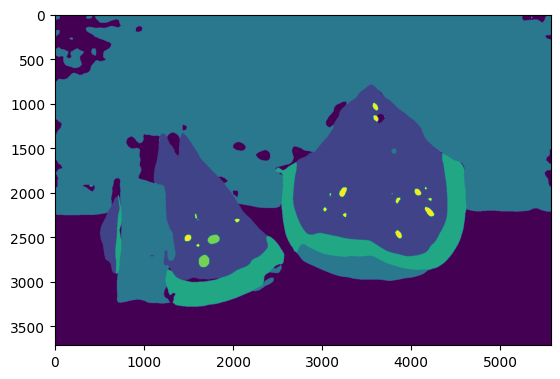

In [11]:
plt.imshow(pred_mask)
plt.show()

## 各类别的配色方案（BGR）

In [12]:
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

In [13]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [14]:
palette_dict

{0: [127, 127, 127],
 1: [0, 0, 200],
 2: [0, 200, 0],
 3: [144, 238, 144],
 4: [30, 30, 30],
 5: [8, 189, 251]}

## 可视化语义分割预测结果

In [15]:
opacity = 0.3 # 透明度，越大越接近原图

In [16]:
# 将预测的整数ID，映射为对应类别的颜色
pred_mask_bgr = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3))
for idx in palette_dict.keys():
    pred_mask_bgr[np.where(pred_mask==idx)] = palette_dict[idx]
pred_mask_bgr = pred_mask_bgr.astype('uint8')

In [17]:
# 将语义分割预测图和原图叠加显示
img_bgr = cv2.addWeighted(img_bgr, opacity, pred_mask_bgr, 1-opacity, 0)

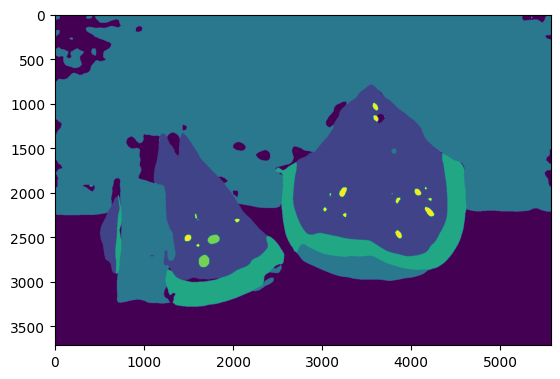

In [18]:
plt.imshow(pred_mask)
plt.show()

In [19]:
cv2.imwrite('output_H4.jpg', img_bgr)

True